In [2]:
from dataset import ImageDataset, load_dataset, train_val_split, data_augmentation
from model import CNN, CNNWithNAL
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# FashionMNIST0.6
## Load dataset

In [3]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.6.npz')

## Preprocessing

In [4]:
T = torch.tensor([[0.4, 0.3, 0.3],
                  [0.3, 0.4, 0.3],
                  [0.3, 0.3, 0.4]], dtype=torch.float32)
training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

train_dataset = ImageDataset(aug_training, aug_labels, transition_matrix=T)
val_dataset = ImageDataset(validation_subset, validation_sub_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [5]:
import os
if not os.path.exists('results/cnn_fashionmnist0.6_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.6", num_epochs=1)
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnn_fashionmnist0.6_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/1], Training Loss: 1.0980, Validation Loss: 1.0958, Validation Accuracy: 36.33%
CNN Test Acc: 79.77%
----------Training CNN round 2/10----------
Epoch [1/1], Training Loss: 1.0959, Validation Loss: 1.0954, Validation Accuracy: 36.83%
CNN Test Acc: 73.30%
----------Training CNN round 3/10----------
Epoch [1/1], Training Loss: 1.0957, Validation Loss: 1.0997, Validation Accuracy: 35.33%
CNN Test Acc: 48.57%
----------Training CNN round 4/10----------
Epoch [1/1], Training Loss: 1.0990, Validation Loss: 1.0954, Validation Accuracy: 37.89%
CNN Test Acc: 87.97%
----------Training CNN round 5/10----------
Epoch [1/1], Training Loss: 1.0975, Validation Loss: 1.0944, Validation Accuracy: 37.53%
CNN Test Acc: 85.90%
----------Training CNN round 6/10----------
Epoch [1/1], Training Loss: 1.0974, Validation Loss: 1.0962, Validation Accuracy: 37.08%
CNN Test Acc: 77.70%
----------Training CNN round 7/10----------
Epoch [1/1], Training Loss: 1.09

## CNN with Noise Adaption Layer Training

In [6]:
if not os.path.exists('results/cnnwithnal_fashionmnist0.6_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNNWithNAL(num_classes=3, dataset_name="FashionMNIST0.6", num_epochs=1)
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnnwithnal_fashionmnist0.6_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnnwithnal_fashionmnist0.6_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/1], Training Loss: 1.1132, Validation Loss: 1.1035, Validation Accuracy: 35.00%
CNN Test Acc: 63.60%
----------Training CNN round 2/10----------
Epoch [1/1], Training Loss: 1.1127, Validation Loss: 1.1354, Validation Accuracy: 37.03%
CNN Test Acc: 82.70%
----------Training CNN round 3/10----------
Epoch [1/1], Training Loss: 1.1111, Validation Loss: 1.0951, Validation Accuracy: 37.28%
CNN Test Acc: 71.70%
----------Training CNN round 4/10----------
Epoch [1/1], Training Loss: 1.1128, Validation Loss: 1.0973, Validation Accuracy: 36.53%
CNN Test Acc: 71.27%
----------Training CNN round 5/10----------
Epoch [1/1], Training Loss: 1.1117, Validation Loss: 1.1058, Validation Accuracy: 35.53%
CNN Test Acc: 54.27%
----------Training CNN round 6/10----------
Epoch [1/1], Training Loss: 1.1126, Validation Loss: 1.1089, Validation Accuracy: 33.11%
CNN Test Acc: 33.67%
----------Training CNN round 7/10----------
Epoch [1/1], Training Loss: 1.11

# Visualisation

/tmp/ipykernel_16583/871925591.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)


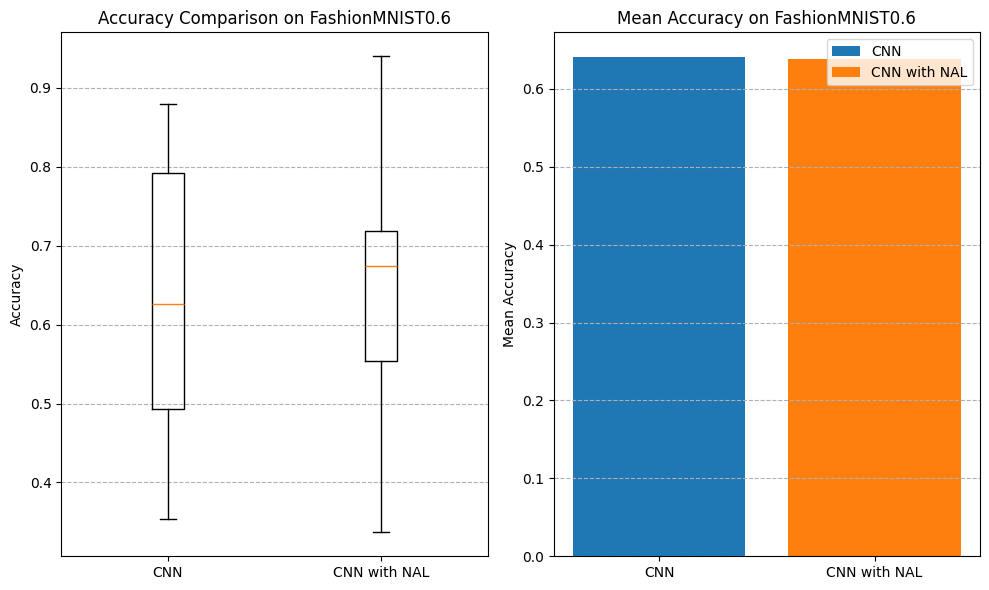

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnn_acc_06 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.6_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_06 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_06, cnnwithnal_acc_06], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.6')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_06), np.mean(cnnwithnal_acc_06)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.6')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.show()


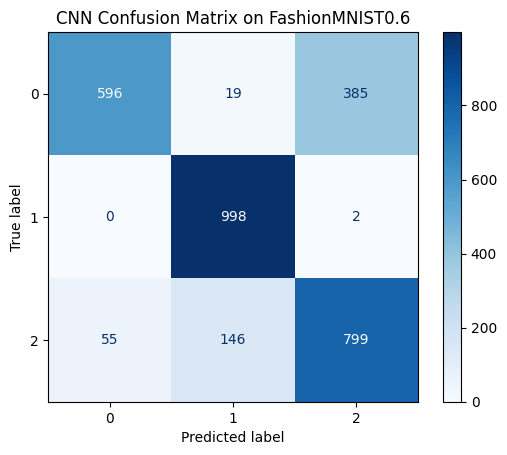

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
with open('results/cnn_fashionmnist0.6_pred_results.pkl', 'rb') as f:
    cnn_pred_results_06 = pickle.load(f)
y_true = cnn_pred_results_06[0][0]
y_pred = cnn_pred_results_06[0][1]
cm = confusion_matrix(y_true, y_pred)
confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
confusion_disp.plot(cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix on FashionMNIST0.6')
plt.show()